# Importing libarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1335.0,30.661423,6.101038,15.9600,26.30250,30.400,34.687500,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# EDA : Exploartory data Analysis

# Finding Numerical Columns

In [ ]:
num = data.select_dtypes(['int64','float64'])
correlation_martix = num.corr()
correlation_martix

,age,bmi,children,charges
age,1.000000,0.108005,0.043262,0.299101
bmi,0.108005,1.000000,0.013074,0.198294
children,0.043262,0.013074,1.000000,0.067119
charges,0.299101,0.198294,0.067119,1.000000


<Axes: >

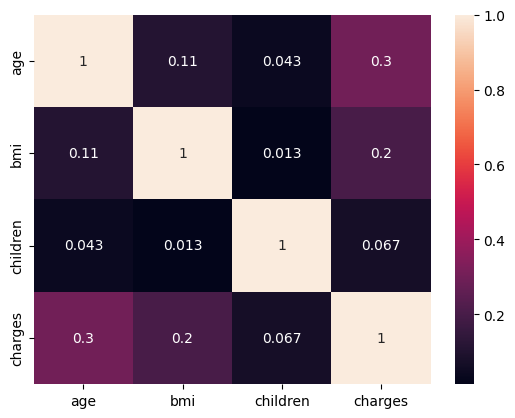

In [ ]:
# Heatmap
sns.heatmap(correlation_martix , annot = True  )

# Finding Categorical Data

In [ ]:
for i in data.columns:
  x = data[i].value_counts()
  print(x)
  print()

age
18    69
19    68
46    29
20    29
52    29
47    29
45    29
48    29
50    29
49    28
28    28
26    28
22    28
53    28
51    28
27    28
21    28
23    28
54    28
25    28
29    27
42    27
43    27
40    27
44    27
24    27
41    27
31    27
30    27
34    26
33    26
32    26
55    26
56    26
57    25
37    25
36    25
38    25
59    25
58    25
35    25
39    25
61    23
62    23
60    23
63    23
64    22
Name: count, dtype: int64

sex
male      674
female    661
Name: count, dtype: int64

bmi
32.300    13
28.310     9
28.880     8
30.800     8
30.875     8
          ..
46.700     1
46.200     1
23.800     1
44.770     1
30.970     1
Name: count, Length: 548, dtype: int64

children
0    571
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

smoker
no     1061
yes     274
Name: count, dtype: int64

region
southeast    364
northwest    324
northeast    324
southwest    323
Name: count, dtype: int64

charges
1639.56310     2
16884.92400    1
11945.13

In [ ]:
cat = data[['sex', 'children' , 'smoker' , 'region']]
cat

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


# Plotting a Pie Chart for Categorical Data

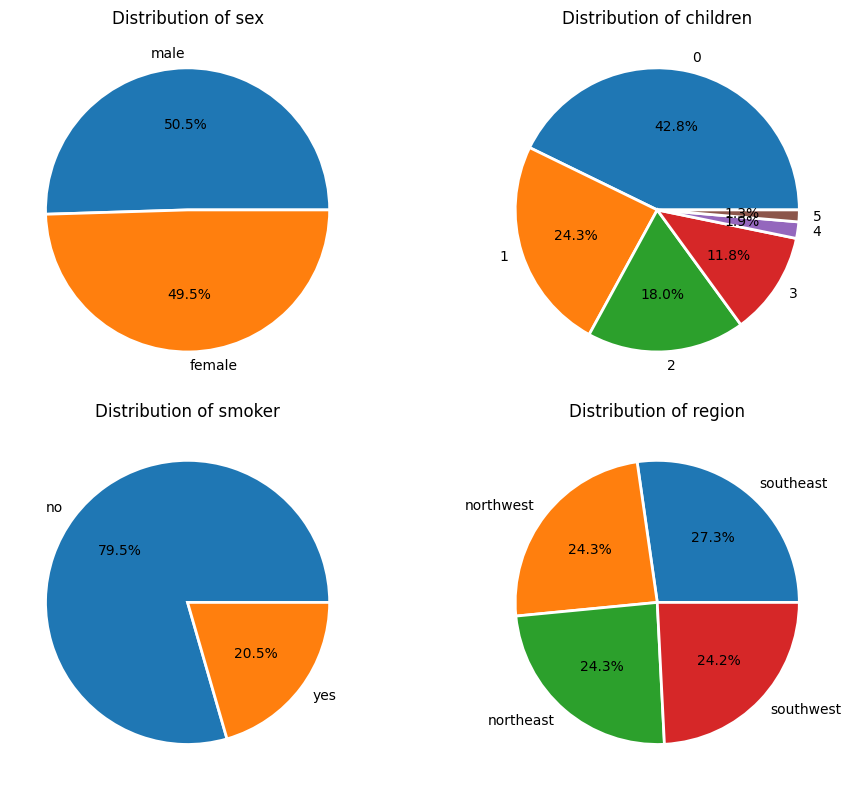

In [ ]:
# Set up the number of subplots based on the number of categorical columns
n_cols = len(cat.columns)
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(10, 8))  # Adjust rows and columns as needed

# Flatten axes for easy indexing if there are multiple rows
axes = axes.flatten()

for i, col in enumerate(cat.columns):
    x = cat[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%' , wedgeprops={"linewidth":2 , "edgecolor": "white"})
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Plotting Bar chart for Categorical Data

<Axes: xlabel='sex'>

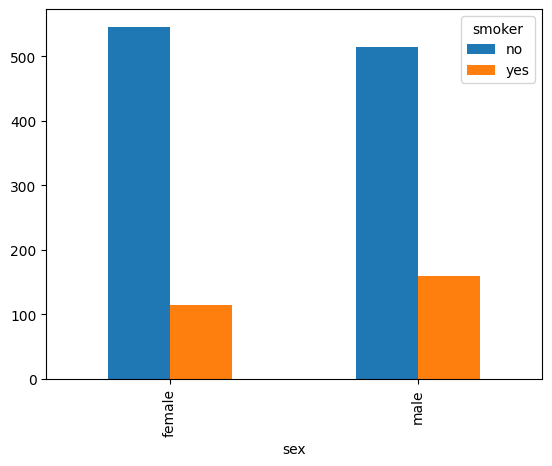

In [ ]:
# Bar Chart
Gender = pd.crosstab(data['sex'] , data['smoker'])
Gender.plot(kind='bar')

In [ ]:
#Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')


<Axes: ylabel='Frequency'>

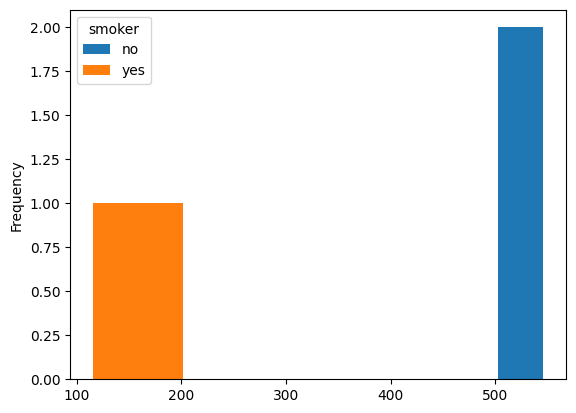

In [ ]:
Gender.plot(kind='hist')

# Finding Otliers on the numerical columns

<Axes: >

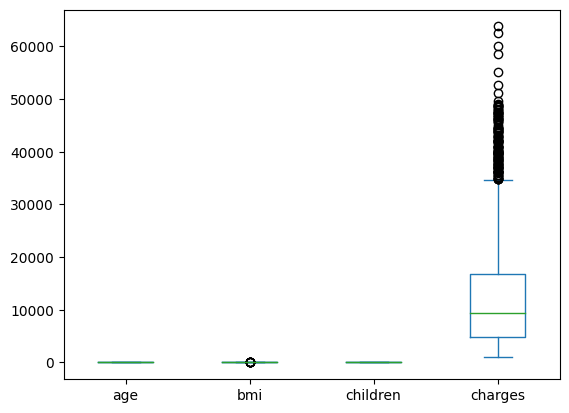

In [ ]:
data.plot(kind = 'box')

## We won't handle the outliers because the data is to few

In [ ]:
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


# Histogram for numerical columns with target ( smoker)

## Splitting the data into 2 data frames for smokers and non-smokers based on the value of 'smoker' column.

In [ ]:

smokers = data[(data['smoker'] == "yes")]
non_smoker = data[(data.smoker == "no")]


In [ ]:
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
smokers.shape

(274, 7)

In [ ]:
print(f"There are {smokers.shape[0]} Smoker, and {non_smoker.shape[0]} non Smoker ")

There are 274 Smoker, and 1061 non Smoker 


In [ ]:
# 2 data frame ( smokers , non_ smoker)
# 4 Numerical columns (age,	bmi	,children	,charges)

# Histogram



# plotting a single histogram for Numerical Columns

(array([47., 30., 23., 27., 22., 33., 28., 22., 15., 27.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

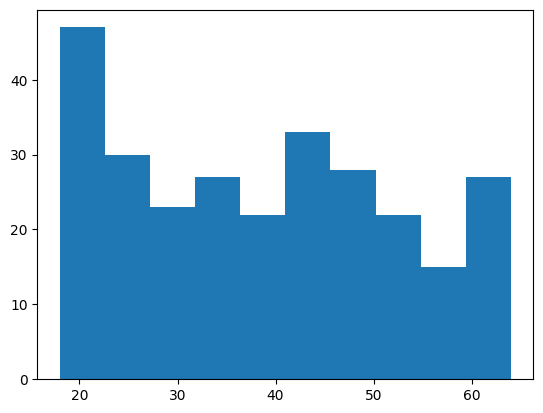

In [ ]:
plt.hist(smokers['age'])

<Axes: xlabel='age', ylabel='Count'>

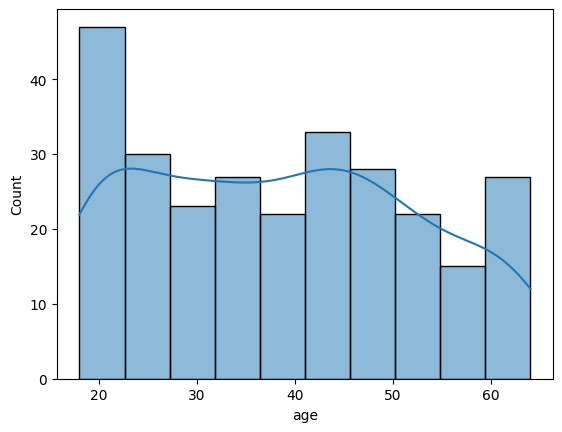

In [ ]:
sns.histplot(smokers['age'] , kde = True)

<Axes: xlabel='age', ylabel='Count'>

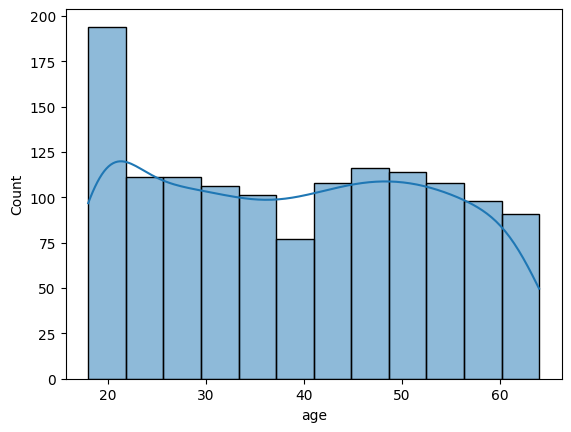

In [ ]:
sns.histplot(data['age'] , kde = True)

<Axes: xlabel='age', ylabel='Count'>

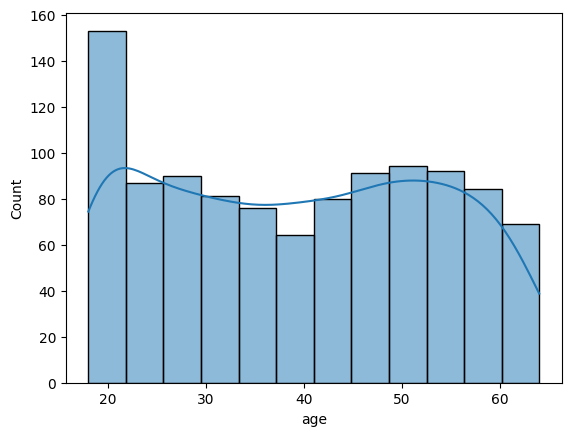

In [ ]:
sns.histplot(non_smoker['age'] , kde = True)

<Axes: xlabel='charges', ylabel='Count'>

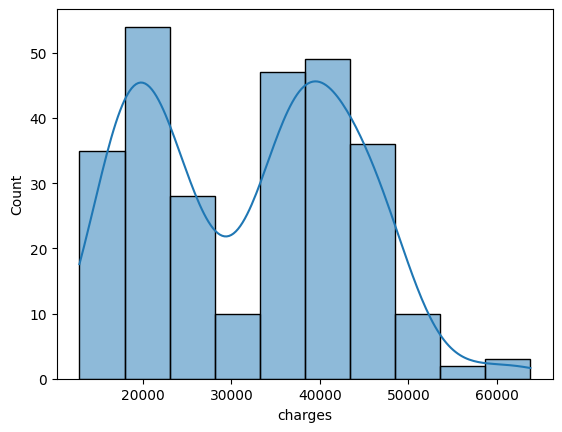

In [ ]:
sns.histplot(smokers['charges'] , kde = True)

<Axes: xlabel='charges', ylabel='Count'>

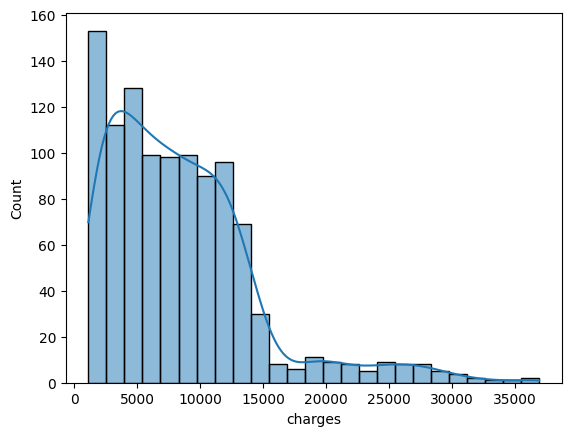

In [ ]:
sns.histplot(non_smoker['charges'] , kde = True)

# Plotting a scatter plot for Numerical columns with Target 'smoker'

<Axes: xlabel='age', ylabel='charges'>

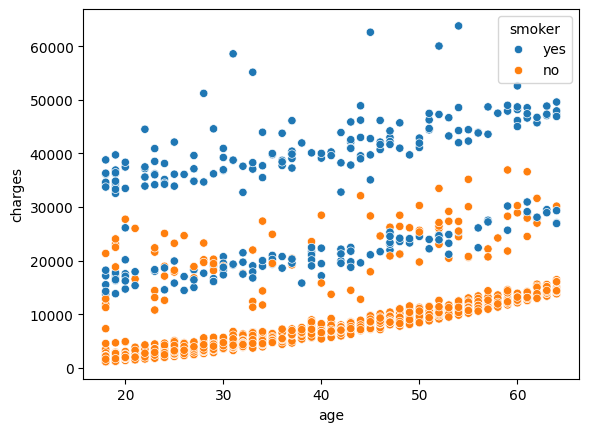

In [ ]:
sns.scatterplot(data = data , x = 'age' , y = 'charges' , hue='smoker')

<Axes: xlabel='children', ylabel='charges'>

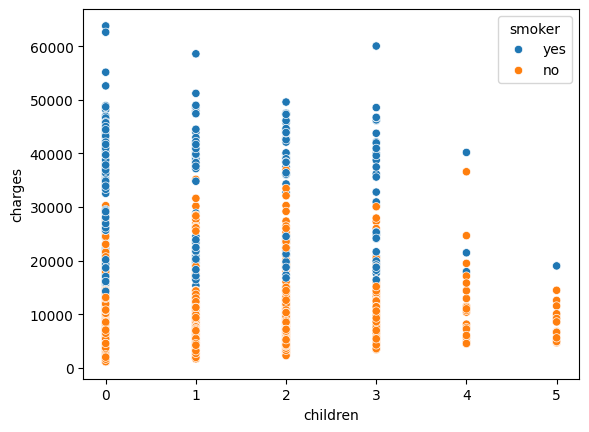

In [ ]:
sns.scatterplot(data = data , x = 'children' , y = 'charges' , hue='smoker')

# Building a crosstable for children and smoker, then plot it into a Bar Chart

smoker     no  yes
children          
0         456  115
1         263   61
2         185   55
3         118   39
4          22    3
5          17    1


<Axes: xlabel='children'>

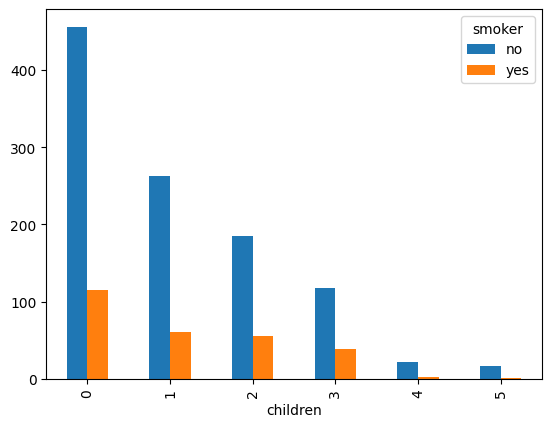

In [ ]:
child = pd.crosstab(data['children'] , data['smoker'])
print(child)
child.plot(kind = 'bar')

#  Plotting a bar chart for Children and Charges based on the smoking statues

<Axes: xlabel='children', ylabel='charges'>

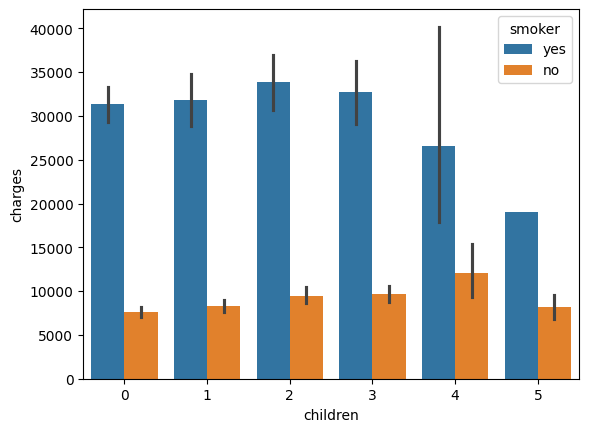

In [ ]:
sns.barplot(data = data , x = 'children' , y = 'charges' , hue='smoker')

In [ ]:

num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

# Plotting a Histogram for all the Numerical columns. Comparing them all between Smokers and Non Smokers.

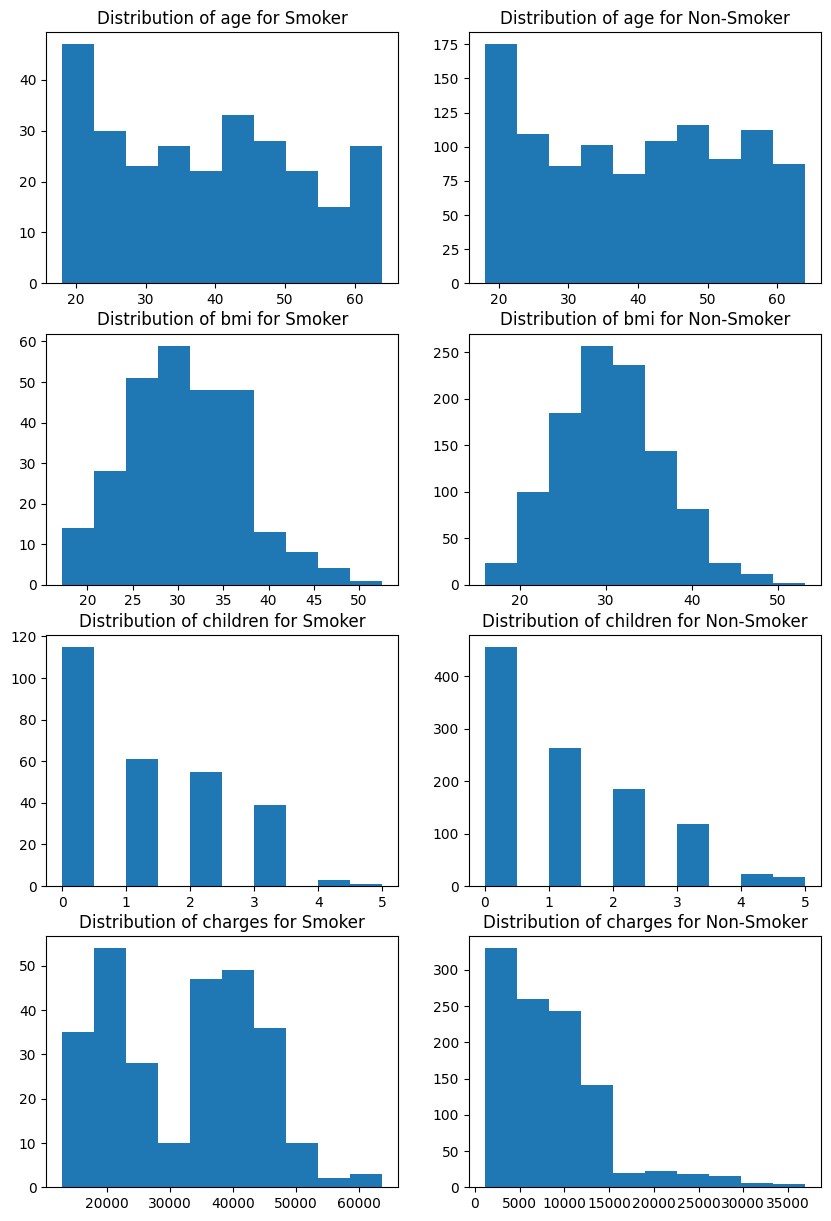

In [ ]:
#sns.scatterplot(data = data , x = 'children' , y = 'charges' , hue='smoker')

suplot_number = 421
#for i in num.columns:
fig = plt.figure(figsize=(10,15))
for i in num.columns:
  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  ax.hist(smokers[i])
  ax.set_title(f'Distribution of {i} for Smoker')

  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  ax.hist(non_smoker[i])
  ax.set_title(f'Distribution of {i} for Non-Smoker')

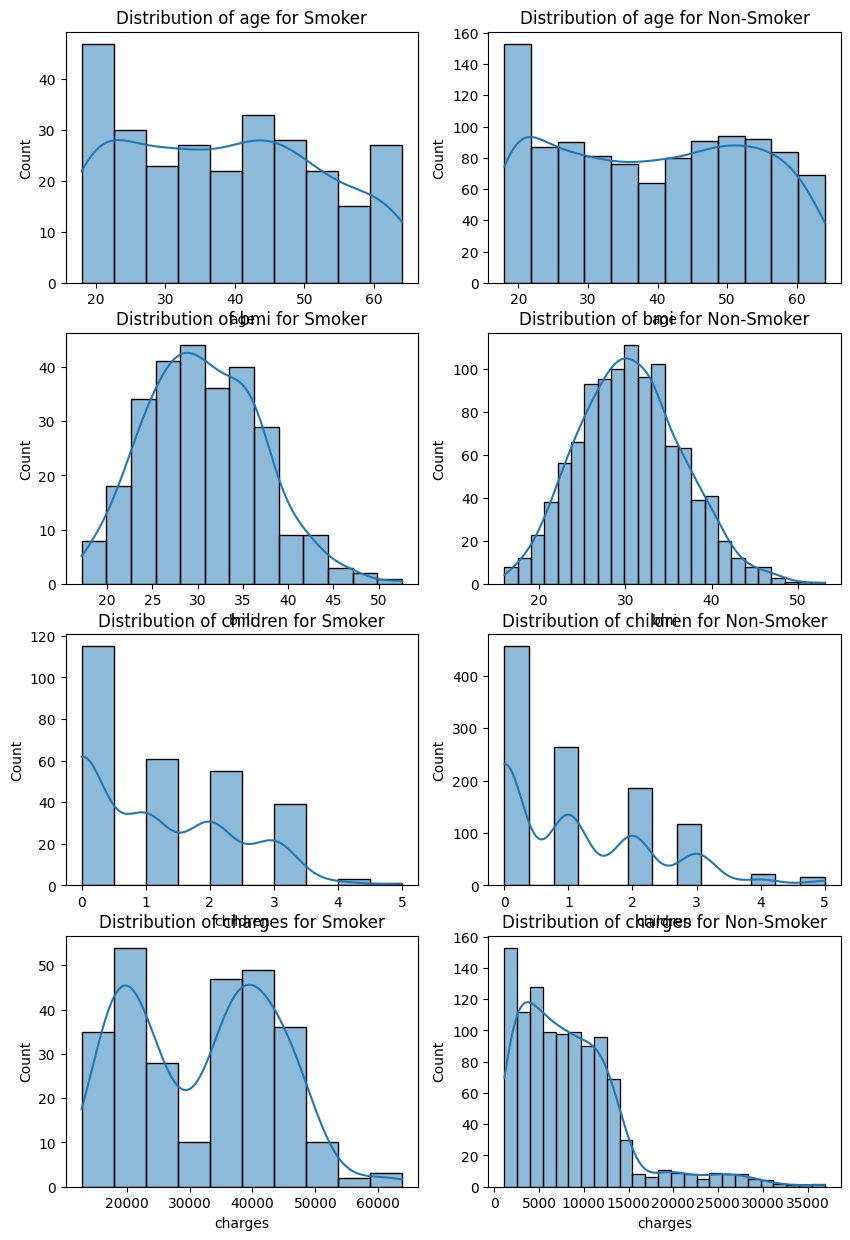

In [ ]:
#sns.histplot(non_smoker['charges'] , kde = True)


suplot_number = 421
#for i in num.columns:
fig = plt.figure(figsize=(10,15))
for i in num.columns:
  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  sns.histplot(smokers[i] , kde = True)
  ax.set_title(f'Distribution of {i} for Smoker')

  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  sns.histplot(non_smoker[i] , kde = True)
  ax.set_title(f'Distribution of {i} for Non-Smoker')

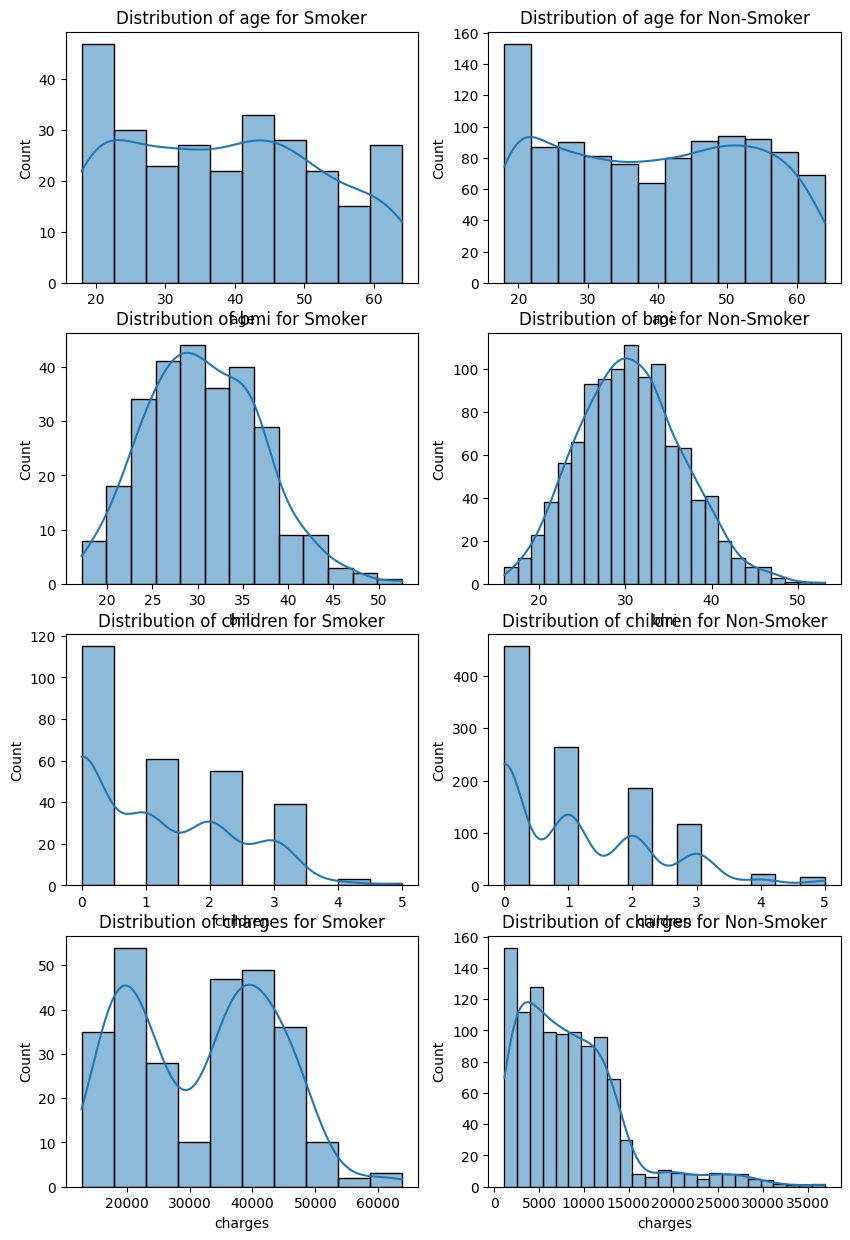

In [ ]:
#sns.histplot(non_smoker['charges'] , kde = True)


suplot_number = 421
#for i in num.columns:
fig = plt.figure(figsize=(10,15))
for i in num.columns:
  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  sns.histplot(smokers[i] , kde = True)
  ax.set_title(f'Distribution of {i} for Smoker')

  ax = fig.add_subplot(suplot_number)
  suplot_number+=1
  sns.histplot(non_smoker[i] , kde = True)
  ax.set_title(f'Distribution of {i} for Non-Smoker')

# 1 - Pie chart ( categorical )
# 2- Bar chart ( categorical & Taregt )
# 3- Hitogram ( Numerical )
# 4- Scatter Plot ( Numerical & Target )
# 5- Bar plot ( Numerical & Target )

# Encoding Categorical Columns
## Enoding the values in the **sex** column to 0 and 1
### We can use Ordinal encoding Too . and if the data is SO BIG we can use Label Encoder.

In [ ]:
# Encoding
# sex ( male , female )

gender = {'male' : 0 , 'female' : 1}
data['sex'] = data['sex'].apply(lambda x : gender[x] )
data.head()

<ipython-input-39-416046bfe86c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].apply(lambda x : gender[x] )


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


## Encoding the data in the **`smoker`** column for no to be **`0`** , and yest to be **`1`**



In [ ]:
# smoker
smokers = {'no' : 0 , 'yes':1 }
data['smoker'] = data['smoker'].apply(lambda x : smokers[x])
data.head()

<ipython-input-40-d0ed92742819>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'] = data['smoker'].apply(lambda x : smokers[x])


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Encoding the data in the **`Region`** column for them to be **`0`** , **`1`** , **`2`** ,**`3`**.

In [ ]:
regions = {'southwest' : 0, 'southeast' : 1, 'northwest' : 2 , 'northeast' : 3}
data['region'] = data['region'].apply(lambda x : regions[x])
data.head()

<ipython-input-44-a45fa03cf3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'] = data['region'].apply(lambda x : regions[x])


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


# Scalling the data based on the **`Maximum`** Value of each columns to be between **`0`** , **`1`** .

In [ ]:
# Scalling
data['age'].max()

64

In [ ]:
data_max = data.max()
data_max

,0
age,64.00000
sex,1.00000
bmi,53.13000
children,5.00000
smoker,1.00000
region,3.00000
charges,63770.42801


In [ ]:
data = data.divide(data_max)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.000000,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.333333,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.333333,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.666667,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.666667,0.060637


In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.495381,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.333333,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Finalizing the project after Visulaization and PreProcessing. the data in now ready to Go into the Machine Learning Pipeline !!
____________________________________________________
 ## By : **`Ola El-Shiekh`**